# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))

3.0 + 2.0·x + 1.0·x²
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


Pierwiastki wielomianu z podanych pierwiastków: [ 1.          2.          3.          4.          4.99999999  6.00000007
  6.99999978  8.00000032  9.00000013  9.99999855 11.00000283 11.99999705
 13.00000182 13.99999938 15.00000009]
Błąd bezwzględny dla każdego pierwiastka: [3.23074900e-14 4.52082816e-13 3.20099502e-12 6.32718766e-10
 1.03597539e-08 6.78804994e-08 2.21349801e-07 3.24101514e-07
 1.34084834e-07 1.45375310e-06 2.82501597e-06 2.95499376e-06
 1.82071527e-06 6.24410399e-07 9.24387660e-08]


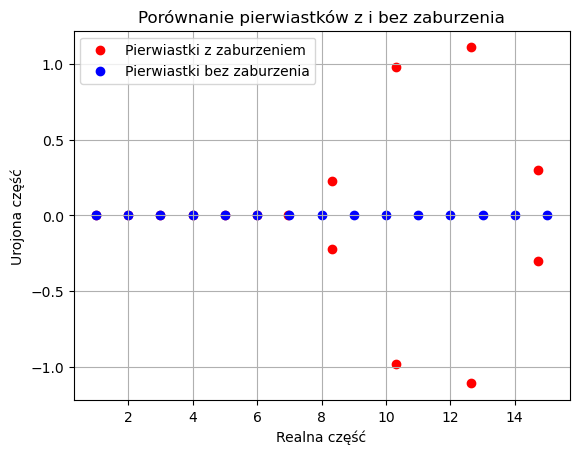

In [3]:
roots_list = np.arange(1, 16)
poly_from_roots = Polynomial.fromroots(roots_list)

roots_from_roots = poly_from_roots.roots()
print("Pierwiastki wielomianu z podanych pierwiastków:", roots_from_roots)

error = np.abs(roots_list - roots_from_roots)
print("Błąd bezwzględny dla każdego pierwiastka:", error)

coefficients_from_roots_with_noise = poly_from_roots.coef.copy()
coefficients_from_roots_with_noise[13] += 1e-5

poly_from_roots_with_noise = Polynomial(coefficients_from_roots_with_noise)
roots_from_roots_with_noise = poly_from_roots_with_noise.roots()

plt.scatter(roots_from_roots_with_noise.real, roots_from_roots_with_noise.imag, color='red', label='Pierwiastki z zaburzeniem')
plt.scatter(roots_from_roots.real, roots_from_roots.imag, color='blue', label='Pierwiastki bez zaburzenia')
plt.xlabel('Realna część')
plt.ylabel('Urojona część')
plt.title('Porównanie pierwiastków z i bez zaburzenia')
plt.legend()
plt.grid(True)
plt.show() 



***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórz wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

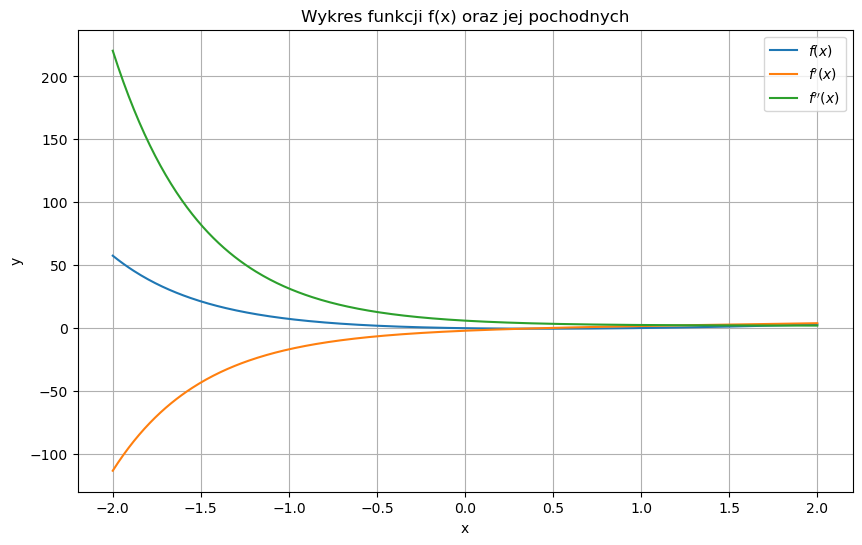

Pierwiastki równania f(x) = 0: [-1.  1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Funkcja f(x)
def f(x):
    return np.exp(-2*x) + x**2 - 1

# Pochodne
def df(x):
    return -2*np.exp(-2*x) + 2*x

def d2f(x):
    return 4*np.exp(-2*x) + 2

# Zakres x dla wykresu
x_values = np.linspace(-2, 2, 400)

# Wartości funkcji
y_values = f(x_values)
y_prime_values = df(x_values)
y_double_prime_values = d2f(x_values)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='$f(x)$')
plt.plot(x_values, y_prime_values, label="$f'(x)$")
plt.plot(x_values, y_double_prime_values, label="$f''(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres funkcji f(x) oraz jej pochodnych')
plt.legend()
plt.grid(True)
plt.show()



***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [ ]:
import numpy as np

def bisekcja(f, a, b, tol=1e-8, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Funkcja musi mieć różne znaki na krańcach przedziału [a, b].")

    for i in range(1, max_iter + 1):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter


def newton_raphson(f, df, x0, tol=1e-8, max_iter=100):
    x = x0
    for i in range(1, max_iter + 1):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Pochodna wynosi 0 — metoda Newtona nie może kontynuować.")
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new, i
        x = x_new
    return x, max_iter


def sieczne(f, x0, x1, tol=1e-8, max_iter=100):
    for i in range(1, max_iter + 1):
        fx0 = f(x0)
        fx1 = f(x1)
        if fx1 - fx0 == 0:
            raise ZeroDivisionError("Dzielenie przez 0 — metoda siecznych nie może kontynuować.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2, i
        x0, x1 = x1, x2
    return x1, max_iter

def f(x):
    return np.exp(-2*x) + x**2 - 1

def df(x):
    return -2*np.exp(-2*x) + 2*x


# Parametry
a, b = 0, 1
x0 = 0.5

# Bisekcja
root_b, iter_b = bisekcja(f, a, b)
print(f"Bisekcja: pierwiastek = {root_b}, iteracje = {iter_b}")

# Newton-Raphson
root_n, iter_n = newton_raphson(f, df, x0)
print(f"Newton-Raphson: pierwiastek = {root_n}, iteracje = {iter_n}")

# Sieczne
root_s, iter_s = sieczne(f, a, b)
print(f"Sieczne: pierwiastek = {root_s}, iteracje = {iter_s}")



ValueError: Funkcja musi mieć różne znaki na krańcach przedziału [a, b].

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [ ]:
import numpy as np
from scipy.optimize import fsolve

def f(x):
    return np.exp(-2*x) + x**2 - 1

def df(x):
    return -2*np.exp(-2*x) + 2*x

def bisekcja(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Brak zmiany znaku – nie można zastosować bisekcji.")
    for i in range(1, max_iter + 1):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(1, max_iter + 1):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Pochodna wynosi 0.")
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new, i
        x = x_new
    return x, max_iter

def sieczne(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(1, max_iter + 1):
        fx0 = f(x0)
        fx1 = f(x1)
        if fx1 - fx0 == 0:
            raise ZeroDivisionError("Dzielenie przez 0.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2, i
        x0, x1 = x1, x2
    return x1, max_iter


roots_info = []

a1, b1 = -2, 0
a2, b2 = 0, 2

for a, b in [(a1, b1), (a2, b2)]:
    print(f"\n=== Szukanie pierwiastka w przedziale [{a}, {b}] ===")

    # Bisekcja
    try:
        root_b, iter_b = bisekcja(f, a, b)
        print(f"Bisekcja:         x = {root_b:.8f}, iteracje = {iter_b}")
    except Exception as e:
        print("Bisekcja błąd:", e)

    # Newton-Raphson
    try:
        root_n, iter_n = newton_raphson(f, df, x0=(a + b)/2)
        print(f"Newton-Raphson:   x = {root_n:.8f}, iteracje = {iter_n}")
    except Exception as e:
        print("Newton-Raphson błąd:", e)

    # Sieczne
    try:
        root_s, iter_s = sieczne(f, a, b)
        print(f"Sieczne:          x = {root_s:.8f}, iteracje = {iter_s}")
    except Exception as e:
        print("Sieczne błąd:", e)


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.